# Clustering Yelp Restaurants

**Part 1: To be completed INDIVIDUALLY and due on October 14 at 7pm.**

In this assignment, we will be working with the [Yelp dataset](https://drive.google.com/open?id=0B4bdB5WPHGsqcmJMNmxzQmQ3aTQ). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

From the Business Objects, let's try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You may want to use only a subset (15-20) of popular categories.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

In [4]:
import json
import csv
import itertools
import sys
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
from collections import Counter
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import iterparse
from datetime import datetime
import csv
import numpy as np
import operator
from pprint import pprint
from collections import namedtuple
data = []
cnttime = 0
with open('yelp_academic_dataset_business.json') as data_file:
    for line in data_file:
        data.append(json.loads(line))

In [5]:
# obtain the top categories with restraurants
df_bussiness_yelp = pd.DataFrame(data)
df_yelp_lonlacity = df_bussiness_yelp[['business_id','city','longitude','latitude','categories']]
# obtain the city as LasVegas
df_yelp_lasvegas = df_yelp_lonlacity.loc[df_yelp_lonlacity['city'].isin(['Las Vegas'])]

In [6]:
drop_list = []
for index_i in range(len(df_yelp_lasvegas)):
    a = []
    b = []
    a = df_yelp_lasvegas.categories[df_yelp_lasvegas.index[index_i]]
    any_in2 = bool(set(a).intersection(['Restaurants']))
    if (any_in2):
        continue
    else:
        drop_list.append(index_i)
df_yelp_final = df_yelp_lasvegas.drop(df_yelp_lasvegas.index[drop_list])

In [7]:
list_cat = []
list_cat = df_yelp_final.values.T.tolist()
list_cat_total = []
for list_i in list_cat[4]:
    for list_j in list_i:
        list_cat_total.append(list_j)        
list_top15 = []
list_top15 = Counter(list_cat_total).most_common(16)
list_top15
list_top15to20 = []
for tuple_i in list_top15:
    list_top15to20.append(tuple_i[0])
list_top15to20.remove('Restaurants')
word_top15to20 = ''
count = 0
for i in list_top15to20:
    count += 1
    if count == 1:
        word_top15to20 = word_top15to20 + i
    else:
        word_top15to20 = word_top15to20 + ' ' + i

In [8]:
drop_list = []
for index_i in range(len(df_yelp_final)):
    a = []
    b = []
    a = df_yelp_final.categories[df_yelp_final.index[index_i]]
    any_in = bool(set(a).intersection(list_top15to20))
    if (any_in):
        continue
    else:
        drop_list.append(index_i)
df_yelp_final2 = df_yelp_final.drop(df_yelp_final.index[drop_list])


In [9]:
# try to insert the list into a big list and insert the space between each list element
big_list = []
for word_i in range(len(df_yelp_final2)):
    word =''
    count = 0
    for each_word in df_yelp_final2.categories[df_yelp_final2.index[word_i]]:
        count += 1
        if count == 1:
            word = word +each_word
        else:
            word = word + ' ' + each_word.lower()
    big_list.append(word.lower())
list_top15to20low = [x.lower() for x in list_top15to20]

In [10]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
list_category_final = df_yelp_final2.categories.tolist()
vectorizer = CountVectorizer(vocabulary = list_top15to20low)
vectorizer
X = vectorizer.fit_transform(big_list)
X_arr = X.toarray()
X_list = X_arr.tolist()

In [11]:
# try find link the latitude and longitude with the matrix:
from sklearn import preprocessing
list_longitude = df_yelp_final2.longitude.tolist()
list_latitude = df_yelp_final2.latitude.tolist()
scaled_long = preprocessing.scale(list_longitude)
scaled_latitude = preprocessing.scale(list_latitude)
for index_row in range(len(X_list)):
    X_list[index_row].insert(0,scaled_long[index_row]*4)
    X_list[index_row].insert(0,scaled_latitude[index_row]*4)
X_array_final = np.asarray(X_list)

In [19]:
%matplotlib inline
import numpy as np
from scipy import cluster
from matplotlib import pyplot
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

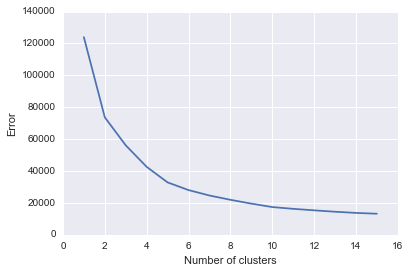

In [13]:
evaluate_clusters(X_array_final, 15)

In [14]:
#sc method to help determine the number of clusters
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0
    s[1] = 0
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')

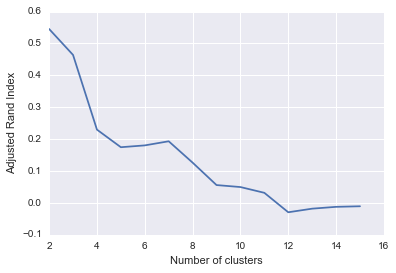

In [15]:
sc_evaluate_clusters(X_array_final,15)

1. As for the data representation, I choose the first 15 popular catogories in all the restraunts in Las Vegas and then excluded the tag of restaurant since it will exist in all catogories. Then in order to combine the similarity and the closeness, I choose to scale the longitude and latitude from 1 to 4. Then I used the CountVectorizer to vectorize the tags list so the feature will become 15 dimensions plus two dimension of longitude and latitude. 

2.For this problem I chose the cluster number as 10 because of the above plottings, the first one is the Error and the second one is the Related Index and the trends goes with the number of clusters from 1 to 15, and according to the two figures, we pick up 10 as the cluster number since it has the lower value of error while at the same time has the higher adjusted rand index.

3. Then we need to use the three techniques of Kmeans, hierarchy clustering and gmm to cluster in the following question.

# first let's start with kmeans first:

In [17]:
import numpy as np
from scipy import cluster
from matplotlib import pyplot
initial = [cluster.vq.kmeans(X_array_final,i) for i in range(1,15)]
cent, var = initial[9]
assignment,cdist = cluster.vq.vq(X_array_final,cent)

# second let's deal with hierarchical clustering

In [67]:
# hierarchy cluster
import numpy as np
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import time
import numpy.random as random
from scipy.cluster.hierarchy import fcluster
import numpy
import pylab
pylab.ion()
Hia_machine = sklearn.cluster.AgglomerativeClustering(n_clusters = 10,affinity='euclidean',linkage = 'ward') 
Hia_machine.fit(X_array_final)
clusters = Hia_machine.labels_

# Thirdly, let's deal with GMM:

In [68]:
#GMM
import time
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

import seaborn as sns

gmm = mixture.GMM(n_components=10,n_iter=5000, covariance_type='spherical')
gmm.fit(X_array_final)
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
classes = gmm.predict(X_array_final)

Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(10 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

In [21]:
# first let's start with kmeans first:
import numpy as np
from scipy import cluster
from matplotlib import pyplot
initial = [cluster.vq.kmeans(X_array_final,i) for i in range(1,15)]
cent, var = initial[9]
assignment,cdist = cluster.vq.vq(X_array_final,cent)

In [22]:
from collections import Counter
# the label of data determination
big_label_list = []
sub_label_list = []
big_coordi_list1 = []
X_list1 = X_list
for index_i in range(10):
    sub_label_list = []
    sub_X = []
    for i in range(len(assignment)):
        if (assignment[i] == index_i):
            sub_label_list.append(df_yelp_final2.categories[df_yelp_final2.index[i]])
            sub_X.append(X_list1[i])
        else:
            continue
    big_label_list.append(sub_label_list)
    big_coordi_list1.append(sub_X)
# big_label_list is the total list stores the label
label_array = np.asarray(big_label_list)
list_label_clusters = []
big_coord_narray = np.asanyarray(big_coordi_list1)

In [23]:
# put the array into a new list
total_big_new_list = []
for i in range(len(label_array)):
    sub_list = []
    for j in range(len(label_array[i])):
        for word_each in label_array[i][j]:
            sub_list.append(word_each)
    total_big_new_list.append(sub_list)
total_big_new_list2 = []
for i in range(len(total_big_new_list)):
    temp_list = []
    for word in total_big_new_list[i]:
        if word not in ['Restaurants']:
            temp_list.append(word)
    total_big_new_list2.append(temp_list)
    
    
final_label_list = []
for i in range(len(total_big_new_list2)):
    first_label_list = []
    sub_label_dict = Counter(total_big_new_list2[i])
    for j in range(10):
        first_label_list.append(sub_label_dict.most_common(10)[j][0])
    final_label_list.append(first_label_list)
final_label_list
final_label_sequence = list(Counter(assignment).values())

In [24]:
final_label_list2 = []
tempt_final_label_list2 = []
for i in range(len(final_label_list)):
    for word_i in final_label_list[i]:
#         if word_i not in tempt_final_label_list2:
        tempt_tuple = (word_i,final_label_sequence[i],i)
        final_label_list2.append(tempt_tuple)
        tempt_final_label_list2.append(word_i)
            
#         else: #need to compare it with the existing value
df_label = pd.DataFrame(final_label_list2, columns=['tag', 'frequency', 'cluster'])            
final_label_list2
df_label

tempt_list_record = []
tempt_list_record_cls = []
final_label_list3 = []
#construct a new list of labels and sort:
df_sorted = df_label.sort(columns = ['frequency','cluster'],ascending=[0,1])
for index_i in range(len(df_sorted)):
    if ((df_sorted.tag[index_i] not in tempt_list_record) & (df_sorted.cluster[index_i] not in tempt_list_record_cls)):
        final_label_list3.append(df_sorted.tag[index_i])
        tempt_list_record.append(df_sorted.tag[index_i])
        tempt_list_record_cls.append(df_sorted.cluster[index_i])
# final_label_list3


C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


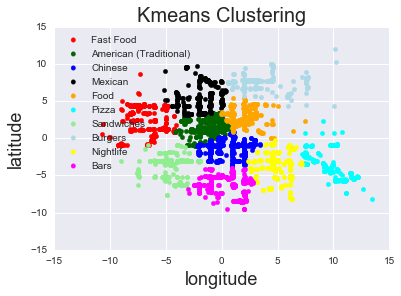

In [25]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
plot_list = []
for i in range(len(final_label_list3)):
    tempt_array = np.asanyarray(big_coordi_list1[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    tempt_array = []

plt.rcParams["figure.figsize"] = [20,12]
plt.title('Kmeans Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# HOW I DO THE LABELING:
Algorithm:
I did the labeling using the weighted category, first I sequenced the clusters by the number of cluster each owns, then I picked up the 
first weighted label, and if the less weighted cluster has the same tag with already existed tag I use the next weighted tag in that cluster. 

# Comments on Kmeans Plotting:
The plotting of the labels are shown on the figure above. So the blue points are the downtown area and people prefer to use Mexican restaurants.


# Hierarchy Cluster

In [26]:
# hierarchy cluster
import numpy as np
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import time
import numpy.random as random
from scipy.cluster.hierarchy import fcluster
import numpy
import pylab
pylab.ion()
# clusters = hcluster.fclusterdata(X_array_final, 10, criterion='maxclust', metric='euclidean', depth=1, method='single')
# clusters.l
# Z = linkage(X_array_final,method ='complete',metric = 'euclidean')
# max_d = 8.5
# clusters = fcluster(Z, max_d, criterion='distance') -1
Hia_machine = sklearn.cluster.AgglomerativeClustering(n_clusters = 10,affinity='euclidean',linkage = 'ward') 
Hia_machine.fit(X_array_final)
clusters = Hia_machine.labels_

In [27]:
from collections import Counter
# the label of data determination
big_label_list = []
sub_label_list = []
big_coordi_list2 = []
X_list2 = X_list
for index_i in range(10):
    sub_label_list = []
    sub_X = []
    for i in range(len(clusters)):
        if (clusters[i] == index_i):
            sub_label_list.append(df_yelp_final2.categories[df_yelp_final2.index[i]])
            sub_X.append(X_list2[i])
        else:
            continue
    big_label_list.append(sub_label_list)
    big_coordi_list2.append(sub_X)
# big_label_list is the total list stores the label
label_array = np.asarray(big_label_list)
list_label_clusters = []

big_coord_narray = np.asanyarray(big_coordi_list2)

In [28]:
# put the array into a new list
total_big_new_list = []
for i in range(len(label_array)):
    sub_list = []
    for j in range(len(label_array[i])):
        for word_each in label_array[i][j]:
            sub_list.append(word_each)
    total_big_new_list.append(sub_list)
total_big_new_list2 = []
for i in range(len(total_big_new_list)):
    temp_list = []
    for word in total_big_new_list[i]:
        if word not in ['Restaurants']:
            temp_list.append(word)
    total_big_new_list2.append(temp_list)
    
    
final_label_list = []
for i in range(len(total_big_new_list2)):
    first_label_list = []
    sub_label_dict = Counter(total_big_new_list2[i])
    for j in range(10):
        first_label_list.append(sub_label_dict.most_common(10)[j][0])
    final_label_list.append(first_label_list)
final_label_list
final_label_sequence = list(Counter(assignment).values())

In [29]:
final_label_list2 = []
tempt_final_label_list2 = []
for i in range(len(final_label_list)):
    for word_i in final_label_list[i]:
#         if word_i not in tempt_final_label_list2:
        tempt_tuple = (word_i,final_label_sequence[i],i)
        final_label_list2.append(tempt_tuple)
        tempt_final_label_list2.append(word_i)
            
#         else: #need to compare it with the existing value
df_label = pd.DataFrame(final_label_list2, columns=['tag', 'frequency', 'cluster'])            
final_label_list2
df_label

tempt_list_record = []
tempt_list_record_cls = []
final_label_list3 = []
#construct a new list of labels and sort:
df_sorted = df_label.sort(columns = ['frequency','cluster'],ascending=[0,1])
for index_i in range(len(df_sorted)):
    if ((df_sorted.tag[index_i] not in tempt_list_record) & (df_sorted.cluster[index_i] not in tempt_list_record_cls)):
        final_label_list3.append(df_sorted.tag[index_i])
        tempt_list_record.append(df_sorted.tag[index_i])
        tempt_list_record_cls.append(df_sorted.cluster[index_i])
# final_label_list3

C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


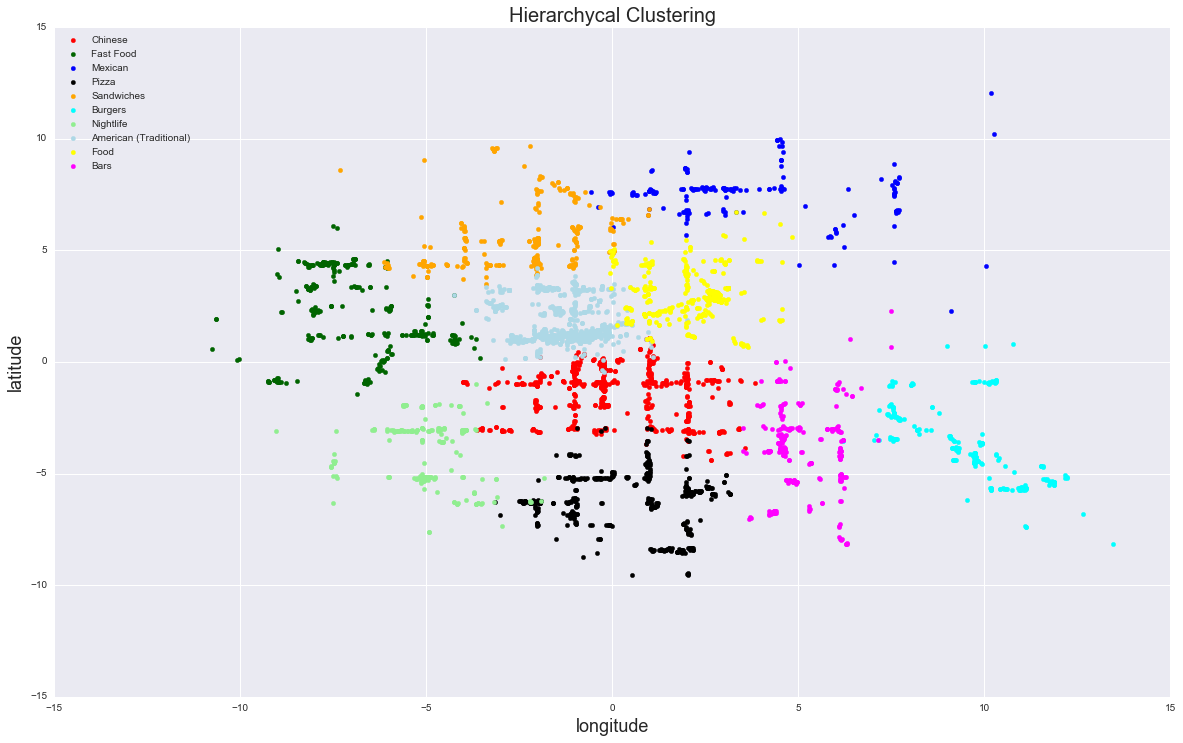

In [30]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
plot_list = []
for i in range(len(final_label_list3)):
    tempt_array = np.asanyarray(big_coordi_list2[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    tempt_array = []

plt.rcParams["figure.figsize"] = [12,8]
plt.title('Hierarchycal Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# HOW I DO THE LABELING:
Algorithm:
I did the labeling using the weighted category, first I sequenced the clusters by the number of cluster each owns, then I picked up the 
first weighted label, and if the less weighted cluster has the same tag with already existed tag I use the next weighted tag in that cluster.

# Comments on Hierarchycal Plotting:
The plotting of the labels are shown on the figure above. So the blue points are the downtown area and people prefer to use Mexican restaurants.

# GMM Cluster

In [31]:
#GMM
import time
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

import seaborn as sns

gmm = mixture.GMM(n_components=10,n_iter=5000, covariance_type='spherical')
gmm.fit(X_array_final)
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
classes = gmm.predict(X_array_final)
# classes

In [32]:
from collections import Counter
# the label of data determination
big_label_list = []
sub_label_list = []
big_coordi_list3 = []
X_list3 = X_list
for index_i in range(10):
    sub_label_list = []
    sub_X = []
    for i in range(len(classes)):
        if (classes[i] == index_i):
            sub_label_list.append(df_yelp_final2.categories[df_yelp_final2.index[i]])
            sub_X.append(X_list3[i])
        else:
            continue
    big_label_list.append(sub_label_list)
    big_coordi_list3.append(sub_X)
# big_label_list is the total list stores the label
label_array = np.asarray(big_label_list)
list_label_clusters = []

big_coord_narray = np.asanyarray(big_coordi_list3)
# classes

In [33]:
# put the array into a new list
total_big_new_list = []
for i in range(len(label_array)):
    sub_list = []
    for j in range(len(label_array[i])):
        for word_each in label_array[i][j]:
            sub_list.append(word_each)
    total_big_new_list.append(sub_list)
total_big_new_list2 = []
for i in range(len(total_big_new_list)):
    temp_list = []
    for word in total_big_new_list[i]:
        if word not in ['Restaurants']:
            temp_list.append(word)
    total_big_new_list2.append(temp_list)
    
    
final_label_list = []
for i in range(len(total_big_new_list2)):
    first_label_list = []
    sub_label_dict = Counter(total_big_new_list2[i])
    for j in range(10):
        first_label_list.append(sub_label_dict.most_common(10)[j][0])
    final_label_list.append(first_label_list)
final_label_list
final_label_sequence = list(Counter(classes).values())

In [34]:
final_label_list2 = []
tempt_final_label_list2 = []
for i in range(len(final_label_list)):
    for word_i in final_label_list[i]:
#         if word_i not in tempt_final_label_list2:
        tempt_tuple = (word_i,final_label_sequence[i],i)
        final_label_list2.append(tempt_tuple)
        tempt_final_label_list2.append(word_i)
            
#         else: #need to compare it with the existing value
df_label = pd.DataFrame(final_label_list2, columns=['tag', 'frequency', 'cluster'])            
final_label_list2
df_label

tempt_list_record = []
tempt_list_record_cls = []
final_label_list3 = []
#construct a new list of labels and sort:
df_sorted = df_label.sort(columns = ['frequency','cluster'],ascending=[0,1])
for index_i in range(len(df_sorted)):
    if ((df_sorted.tag[index_i] not in tempt_list_record) & (df_sorted.cluster[index_i] not in tempt_list_record_cls)):
        final_label_list3.append(df_sorted.tag[index_i])
        tempt_list_record.append(df_sorted.tag[index_i])
        tempt_list_record_cls.append(df_sorted.cluster[index_i])
# final_label_list3

C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


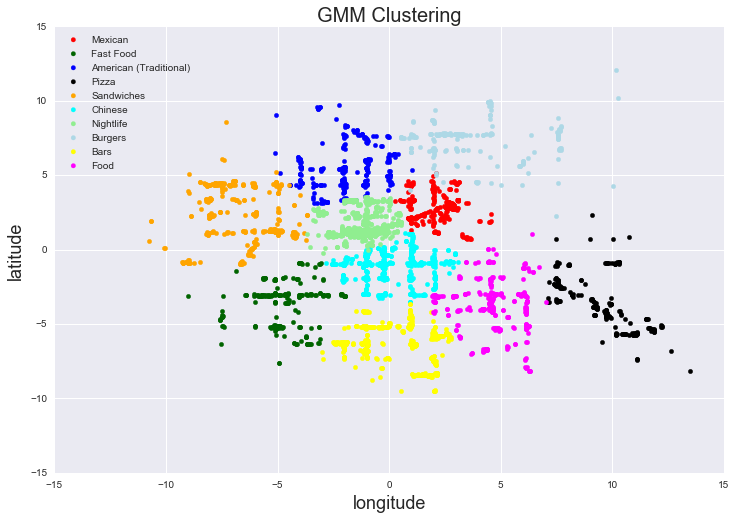

In [35]:
import numpy as np
import matplotlib.pyplot as plt
cols = [LABEL_COLOR_MAP[l] for l in classes]
LABEL_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'light_green',7:'light_blue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
labs = [LABEL_MAP[l] for l in classes]
plot_list = []
for i in range(len(final_label_list3)):
    tempt_array = np.asanyarray(big_coordi_list3[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    tempt_array = []
plt.rcParams["figure.figsize"] = [12,9]
plt.title('GMM Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# HOW I DO THE LABELING:
Algorithm:
I did the labeling using the weighted category, first I sequenced the clusters by the number of cluster each owns, then I picked up the 
first weighted label, and if the less weighted cluster has the same tag with already existed tag I use the next weighted tag in that cluster.

# Comments on GMM Plotting:
The plotting of the labels are shown on the figure above. So the blue points are the downtown area and people prefer to use Mexican restaurants.

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

# lets start with kmeans

In [36]:
import scipy.spatial.distance as cs
# we can use euclidean distance to detect the outliers per each sub_cluster
def find_farest(X_coordinates, centroids):
    return cs.euclidean(X_coordinates, centroids)
# print(type(cent))
# construct a list of tuples
temp_df_list = []
for i in range(len(X_array_final)):
    temp_df_list.append((X_array_final[i],assignment[i],cent[assignment[i]],final_label_list3[assignment[i]]))
    
df_euclidean_sub = pd.DataFrame(temp_df_list, columns=['coordinates','cluster', 'centroids','tags']) 
df_euclidean_sub2 = df_euclidean_sub.sort(columns=['cluster'])
list_index = []
for cluster_i in range(len(df_euclidean_sub2)):
    list_index.append(cluster_i) 
list_temporary = []
for cluster_i in range(len(df_euclidean_sub2)):
#     print(find_farest(df_euclidean_sub2.coordinates[cluster_i],df_euclidean_sub2.centroids[cluster_i]))
    list_temporary.append(find_farest(df_euclidean_sub2.coordinates[cluster_i],df_euclidean_sub2.centroids[cluster_i]))
df_euclidean_outliers = pd.DataFrame(list_temporary,columns=['Distance'])

temporary_array = np.asarray(list_temporary)
df_euclidean_sub2['distance'] = temporary_array

C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [37]:
# find the maximum and min
# list_euclidean = []
# for i in df_euclidean_sub2.index:
#     for cluster_i in df_euclidean_sub2.cluster:
#         list_euclidean = 
df_euclidean_sub2.groupby(['cluster'],sort = False)['distance'].max()
idx = df_euclidean_sub2.groupby(['cluster'])['distance'].transform(max) == df_euclidean_sub2['distance']
df_farest_points = df_euclidean_sub2[idx]
df_farest_points

,coordinates,cluster,centroids,tags,distance
1346,"[-7.70911601648, 4.40827760988, 0.0, 0.0, 0.0,...",0,"[-6.73471697729, 2.43912135532, 0.0, 0.1449275...",Mexican,6.314080
581,"[-1.07383913331, 3.26914912818, 0.0, 0.0, 0.0,...",1,"[-1.20949810442, 1.40144454316, 0.0, 0.0872093...",Fast Food,4.901500
375,"[-0.468498385356, -1.0120569614, 0.0, 1.0, 0.0...",2,"[0.324999911963, -1.31047060672, 0.0, 0.141153...",American (Traditional),7.978276
172,"[-3.99528265675, 5.85043989856, 0.0, 0.0, 0.0,...",3,"[-1.96437593786, 5.14555028294, 0.0, 0.2125748...",Pizza,7.413230
3155,"[2.76728245409, 3.0616669518, 0.0, 1.0, 0.0, 0...",4,"[2.2054168775, 2.88882130838, 0.0, 0.221910112...",Sandwiches,6.299985
946,"[9.31114137202, -3.87125804968, 0.0, 0.0, 0.0,...",5,"[9.58185413084, -3.60402124055, 0.0, 0.1586538...",Chinese,7.091843
2888,"[-4.71191125473, -5.82265298837, 0.0, 0.0, 0.0...",6,"[-4.66861255089, -3.72218596735, 0.0, 0.139130...",Nightlife,4.719397
1871,"[3.04943344342, 7.75368894442, 0.0, 0.0, 0.0, ...",7,"[3.72110986039, 7.49439252669, 0.0, 0.3, 0.0, ...",Burgers,4.214763
3174,"[2.60611026517, -4.00442627049, 0.0, 0.0, 0.0,...",8,"[4.8412014482, -3.93767918564, 0.0, 0.16666666...",Bars,4.813060
2264,"[0.854706402773, -5.21038992139, 0.0, 0.0, 0.0...",9,"[0.296313886838, -6.32431889421, 0.0, 0.142180...",Food,5.396645


# Outliers for Kmeans

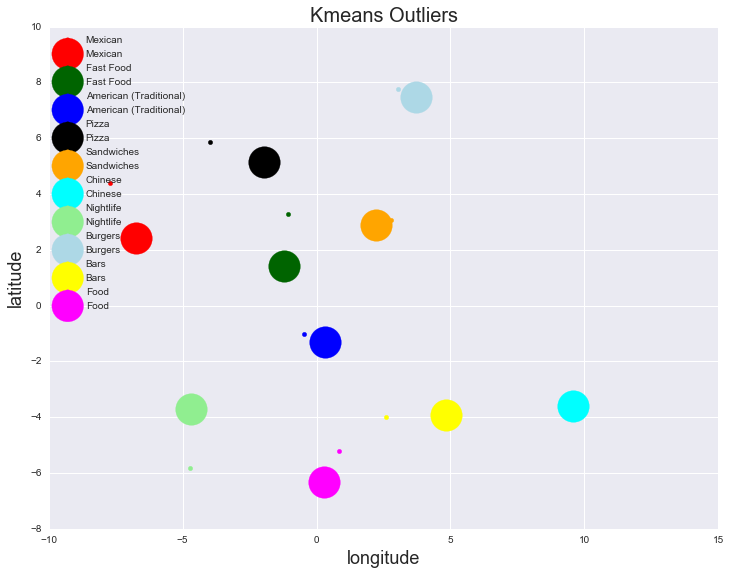

In [38]:
LABEL_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'light_green',7:'light_blue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
labs = [LABEL_MAP[l] for l in classes]
plot_list = []
for i in range(len(df_farest_points)):
    tempt_array = np.asarray(df_farest_points.coordinates[df_farest_points.index[i]])
    tempt_array_cent = np.asarray(df_farest_points.centroids[df_farest_points.index[i]])
    ll = plt.scatter(tempt_array[0],tempt_array[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    lc = plt.scatter(tempt_array_cent[0],tempt_array_cent[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i],marker='o',s = 1000)
    tempt_array = []
plt.rcParams["figure.figsize"] = [20,12]
plt.title('Kmeans Outliers', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# find the outliers of hierarchy clustering

In [39]:
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
D = len(X_array_final[0])
for idx,clno in enumerate(clusters):
    centroids.setdefault(clno,np.zeros(D)) 
    centroids[clno] += X_array_final[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])
centroids_list = list(centroids.values())
centroids_keys_list = list(centroids.keys())

In [40]:
import scipy.spatial.distance as cs
# we can use euclidean distance to detect the outliers per each sub_cluster
def find_farest(X_coordinates, centroids):
    return cs.euclidean(X_coordinates, centroids)
# print(type(cent))
# construct a list of tuples
temp_df_list = []
for i in range(len(X_array_final)):
    temp_df_list.append((X_array_final[i],clusters[i],centroids_list[clusters[i]],final_label_list3[clusters[i]]))
    
df_euclidean_sub_1 = pd.DataFrame(temp_df_list, columns=['coordinates','cluster', 'centroids','tags']) 
df_euclidean_sub_2 = df_euclidean_sub_1.sort(columns=['cluster'])
list_index = []
for cluster_i in range(len(df_euclidean_sub_2)):
    list_index.append(cluster_i) 
list_temporary = []
for cluster_i in range(len(df_euclidean_sub_2)):
#     print(find_farest(df_euclidean_sub2.coordinates[cluster_i],df_euclidean_sub2.centroids[cluster_i]))
    list_temporary.append(find_farest(df_euclidean_sub_2.coordinates[cluster_i],df_euclidean_sub_2.centroids[cluster_i]))
df_euclidean_outliers = pd.DataFrame(list_temporary,columns=['Distance'])

temporary_array = np.asarray(list_temporary)
df_euclidean_sub_2['distance'] = temporary_array

C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [41]:
df_euclidean_sub_2.groupby(['cluster'],sort = False)['distance'].max()
idx = df_euclidean_sub_2.groupby(['cluster'])['distance'].transform(max) == df_euclidean_sub_2['distance']
df_farest_points = df_euclidean_sub_2[idx]
df_farest_points

,coordinates,cluster,centroids,tags,distance
3293,"[-0.210819760011, -2.03341479818, 0.0, 0.0, 0....",0,"[0.0672778486321, -1.35586108296, 0.0, 0.14193...",Mexican,5.899515
3244,"[-8.95334469594, -0.916469516843, 0.0, 1.0, 0....",1,"[-6.81537601135, 2.20007179504, 0.0, 0.1366459...",Fast Food,4.291161
87,"[1.9735180149, 6.2453603748, 0.0, 1.0, 0.0, 0....",2,"[3.64725147876, 7.51244498434, 0.0, 0.27810650...",American (Traditional),5.258343
1410,"[-1.00143078085, -6.101797368, 0.0, 0.0, 0.0, ...",3,"[0.388753062077, -6.23857663443, 0.0, 0.139908...",Pizza,4.570931
3459,"[-2.05952465876, 5.45623013288, 0.0, 0.0, 0.0,...",4,"[-2.43825181847, 5.5782488245, 0.0, 0.21933085...",Sandwiches,8.029148
2597,"[11.1221279092, -7.39457253815, 0.0, 0.0, 0.0,...",5,"[9.54247066891, -3.64965963869, 0.0, 0.1523809...",Chinese,7.474088
2863,"[-5.06362402334, -5.29975731472, 0.0, 0.0, 0.0...",6,"[-4.95095323452, -4.04577448975, 0.0, 0.140625...",Nightlife,4.471524
3521,"[-0.932846114822, 1.04845115866, 0.0, 1.0, 0.0...",7,"[-1.24770215369, 1.69594141379, 0.0, 0.0890410...",Burgers,7.826651
1215,"[0.954249971509, 3.26115067835, 0.0, 0.0, 0.0,...",8,"[2.09770637304, 3.00952071613, 0.0, 0.24594594...",Bars,4.727448
3408,"[4.38683957982, -6.67764549307, 0.0, 0.0, 0.0,...",9,"[5.10455009072, -3.86457177538, 0.0, 0.1706349...",Food,5.450047


# Outliers for Hierarchical Clustering

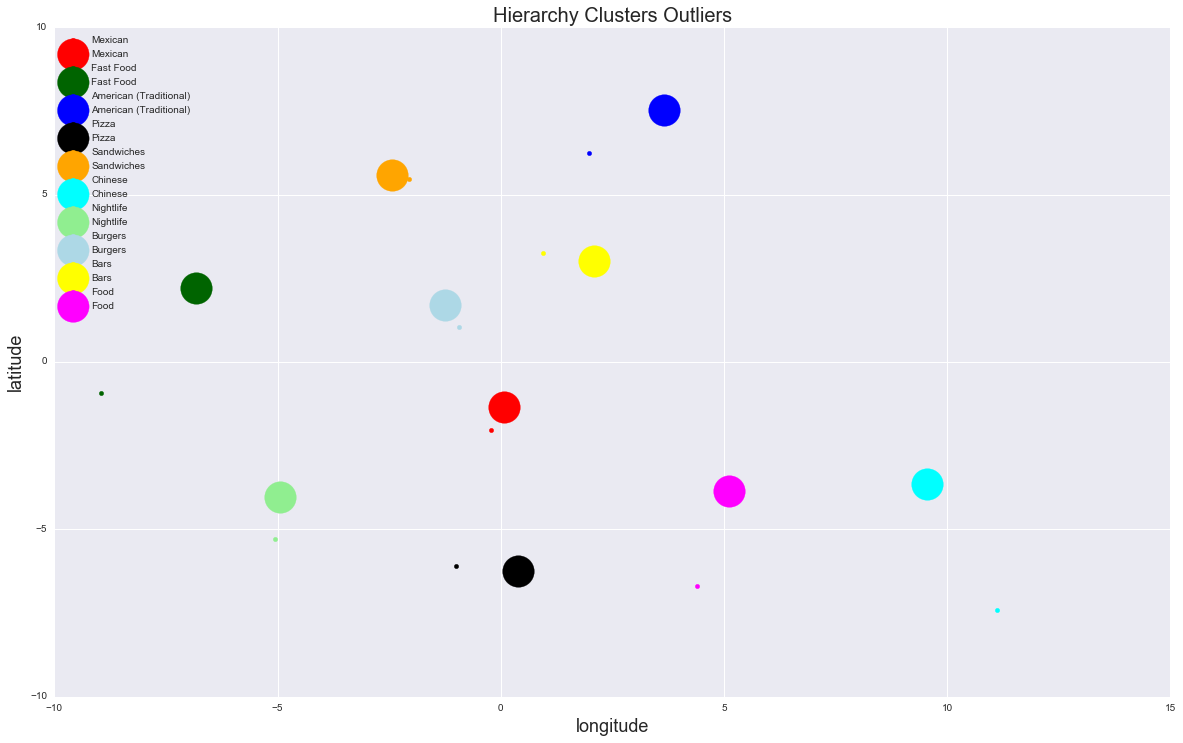

In [42]:
LABEL_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'light_green',7:'light_blue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
labs = [LABEL_MAP[l] for l in classes]
plot_list = []
for i in range(len(df_farest_points)):
    tempt_array = np.asarray(df_farest_points.coordinates[df_farest_points.index[i]])
    tempt_array_cent = np.asarray(df_farest_points.centroids[df_farest_points.index[i]])
    ll = plt.scatter(tempt_array[0],tempt_array[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    lc = plt.scatter(tempt_array_cent[0],tempt_array_cent[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i],marker='o',s = 1000)
    tempt_array = []
plt.rcParams["figure.figsize"] = [20,12]
plt.title('Hierarchy Clusters Outliers', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# Last let's do the GMM

In [43]:
lens = {}      # will contain the lengths for each cluster
centroids = {} # will contain the centroids of each cluster
D = len(X_array_final[0])
for idx,clno in enumerate(classes):
    centroids.setdefault(clno,np.zeros(D)) 
    centroids[clno] += X_array_final[idx,:]
    lens.setdefault(clno,0)
    lens[clno] += 1
# Divide by number of observations in each cluster to get the centroid
for clno in centroids:
    centroids[clno] /= float(lens[clno])
centroids_list = list(centroids.values())
centroids_keys_list = list(centroids.keys())

In [44]:
import scipy.spatial.distance as cs
# we can use euclidean distance to detect the outliers per each sub_cluster
def find_farest(X_coordinates, centroids):
    return cs.euclidean(X_coordinates, centroids)
# print(type(cent))
# construct a list of tuples
temp_df_list = []
for i in range(len(X_array_final)):
    temp_df_list.append((X_array_final[i],clusters[i],centroids_list[clusters[i]],final_label_list3[clusters[i]]))
    
df_euclidean_sub_1 = pd.DataFrame(temp_df_list, columns=['coordinates','cluster', 'centroids','tags']) 
df_euclidean_sub_2 = df_euclidean_sub_1.sort(columns=['cluster'])
list_index = []
for cluster_i in range(len(df_euclidean_sub_2)):
    list_index.append(cluster_i) 
list_temporary = []
for cluster_i in range(len(df_euclidean_sub_2)):
#     print(find_farest(df_euclidean_sub2.coordinates[cluster_i],df_euclidean_sub2.centroids[cluster_i]))
    list_temporary.append(find_farest(df_euclidean_sub_2.coordinates[cluster_i],df_euclidean_sub_2.centroids[cluster_i]))
df_euclidean_outliers = pd.DataFrame(list_temporary,columns=['Distance'])

temporary_array = np.asarray(list_temporary)
df_euclidean_sub_2['distance'] = temporary_array

C:\Users\shou\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [45]:
df_euclidean_sub_2.groupby(['cluster'],sort = False)['distance'].max()
idx = df_euclidean_sub_2.groupby(['cluster'])['distance'].transform(max) == df_euclidean_sub_2['distance']
df_farest_points = df_euclidean_sub_2[idx]
df_farest_points

,coordinates,cluster,centroids,tags,distance
50,"[0.977975617401, -0.910703470169, 0.0, 0.0, 0....",0,"[2.21543203129, 2.90408360882, 0.0, 0.21806853...",Mexican,13.559367
3073,"[-6.54601639963, 4.35326737577, 0.0, 0.0, 0.0,...",1,"[-4.63997656945, -3.69811435434, 0.0, 0.137931...",Fast Food,12.643004
1876,"[4.52231356771, 9.0536280508, 0.0, 1.0, 0.0, 0...",2,"[-1.97126156384, 5.40808604046, 0.0, 0.2096219...",American (Traditional),12.109430
1054,"[-1.13309139091, -4.14726425901, 0.0, 0.0, 0.0...",3,"[9.54699871165, -3.60150673633, 0.0, 0.1611374...",Pizza,12.761232
3459,"[-2.05952465876, 5.45623013288, 0.0, 0.0, 0.0,...",4,"[-6.6584205983, 2.42797354501, 0.0, 0.14044943...",Sandwiches,13.884747
1698,"[10.1164010552, -0.975225554776, 0.0, 0.0, 0.0...",5,"[0.118899133277, -1.10379569649, 0.0, 0.137037...",Chinese,12.694845
1092,"[-5.37229110243, -3.08794717491, 0.0, 0.0, 0.0...",6,"[-1.18550752101, 1.61728756429, 0.0, 0.0929411...",Nightlife,13.018546
3084,"[-3.25663086568, 2.64326736832, 0.0, 0.0, 0.0,...",7,"[3.70831553027, 7.29333032735, 0.0, 0.31868131...",Burgers,15.111570
1215,"[0.954249971509, 3.26115067835, 0.0, 0.0, 0.0,...",8,"[0.286981860606, -6.3268556497, 0.0, 0.1401425...",Bars,13.875703
2862,"[6.13059669616, -3.94770977328, 0.0, 0.0, 0.0,...",9,"[4.62398100337, -3.8297008053, 0.0, 0.16987179...",Food,12.388491


# Outliers for GMM

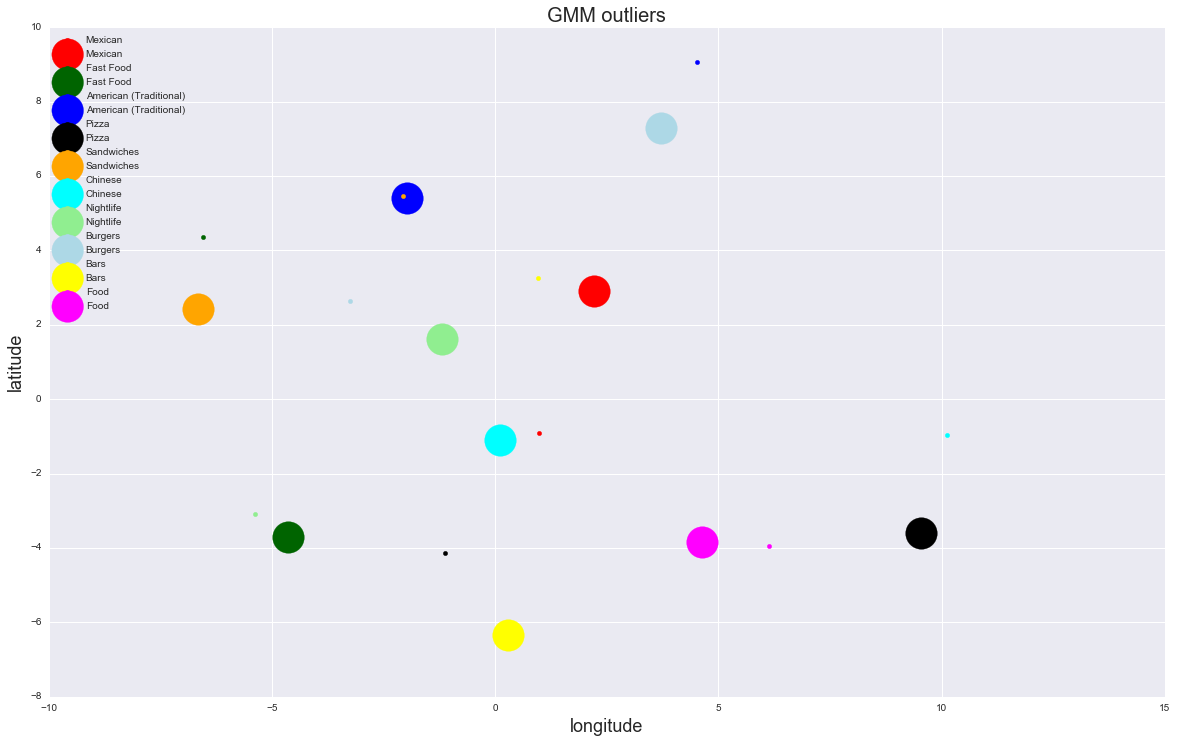

In [46]:
LABEL_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'light_green',7:'light_blue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
labs = [LABEL_MAP[l] for l in classes]
plot_list = []
for i in range(len(df_farest_points)):
    tempt_array = np.asarray(df_farest_points.coordinates[df_farest_points.index[i]])
    tempt_array_cent = np.asarray(df_farest_points.centroids[df_farest_points.index[i]])
    ll = plt.scatter(tempt_array[0],tempt_array[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i])
    lc = plt.scatter(tempt_array_cent[0],tempt_array_cent[1], color=LABEL_MAP_Color_list[i],label = final_label_list3[i],marker='o',s = 1000)
    tempt_array = []
plt.rcParams["figure.figsize"] = [20,12]
plt.title('GMM outliers', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
import sklearn.metrics as metrics
ss = metrics.silhouette_score(X,assignment,metric='euclidean')
print('Silhouette Score is {}'.format(ss))

Silhouette Score is -0.04425774157333782


# Outliers for three different techniques:

From the plottings above, We can tell that Hierarchycal and K means are pretty much similar for the outliers detection. K means is a "simple" method used for clustering, although the basic kmeans has hard assignments, where each data only belongs to one cluster. While GMM is a soft methodology, and you can find the outliers for each cluster is very close to the first two techniques, while on the other hand we can difinitely find the some outliers are far away from the centroids. These observations are very interesting. And the centroids are bigger nodes, and the
the outliers results are provided on the above dataframe.

Give a detailed analysis comparing the results you obtained from the 3 techniques. **(10 pts)**

# Comparison of three methods:

1. According to the lecture slides, we can take down that Kmeans is a special case of GMM method.
2. K-means we need to determine the number of clusters in advance,but for hiachical method we need to determine the threshold first.
3. For GMM it's a soft method, it's very same to Bayesian methodology.
4. For the unsupervised learn we can tell the number of cluster determination is very important, however,
if the number is too large, we will face with the overfitting problem.
5. And also according to the outlier results for this case, when we choose to use the first two methods the outliers make more sense than GMM since they are very close to the centroids of each cluster.
and the GMM's' outliers are far away from the centroids.
6. From the plotting results of the above three techniques,Kmeans and hierarchical cluster are very similar and the downtown area belong to Mexican. While on the other hand, GMM obtains the downtown area as Chinese Restaurant. The difference may led by the number of Clusters we determined.
7. We need to decide on the number of clusters first for Kmeans and GMM, because actually Kmeans is the special case of GMM, but for Hierarchy clustering we don't need to.
8. Summary, when the feature's dimensions are very high, I guess GMM will perform better.

----------